In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
#Replace missing values in categorical columns with the mode
                 #  location
                 #  cuisines
                 #  rest_type

# Drop rows with missing values in 'phone'


#Replace the dish_liked missing values using MultinomialNB


#Replace the rating missing values using RandomForest regressor


#Relace cost missing values with mean






#EDA

#Alanysis the average rating for each restaurant

#Alanysis the average rating for each location

#Find the costliest and cheapest restaurant

#Find the Overall raing with respect to location and restaurant

# Analysis most popular cuisine in each locality   --->from this new comers what type of cusine will prefer particulat location

#Analysis the type of orders           --->from this restaurants should include both type of orders(online 48% offline 52%)

#Find the top dishes                   --->from this new restaurants fix their menu

#Top Locations with High Competition   ---->from this new comers will know about particular area competition

#Correlation between Cost and Rating   --->cost is increasing rating little more increase 0.08

#Correlation between Rating and Votes  --->rating is increasing vote is also increasing 0.3

In [11]:
df=pd.read_csv('/content/drive/MyDrive/week2_python/zomato.csv')

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.info

<bound method DataFrame.info of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      

In [28]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
#duplicate
print(len(df[df.duplicated()]))

0


In [3]:
#missing or null values count
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<Axes: >

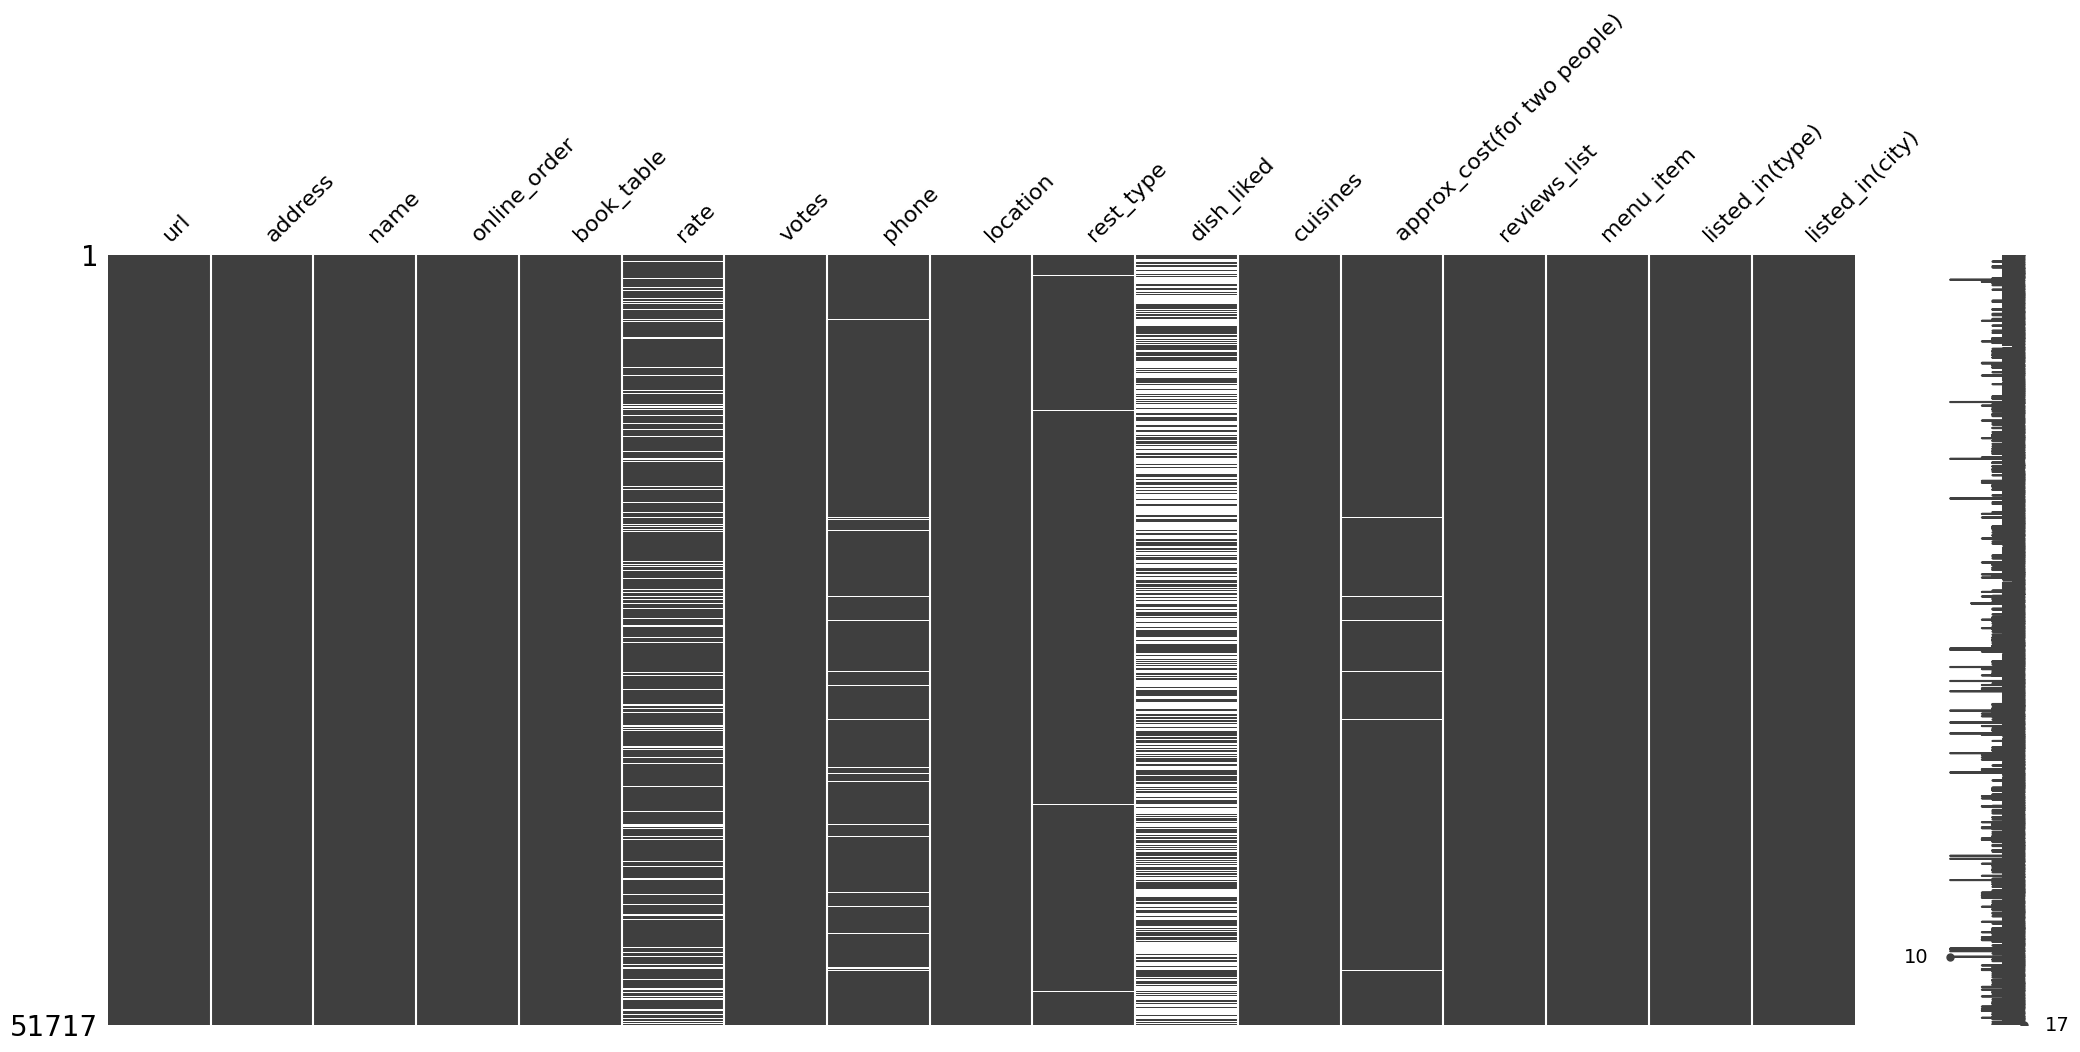

In [ ]:
#visualizing the missing values
import missingno as msno
msno.matrix(df)

In [12]:
# Replace missing values in categorical columns with the mode
categorical_cols = ['location', 'cuisines', 'rest_type']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [13]:
# Drop rows with missing values in 'phone'
df = df.dropna(subset=['phone'])


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df['reviews_list'].fillna('')  # Replace NaN with empty string
y = df['dish_liked'].fillna('')    # Replace NaN with empty string

# Text preprocessing and feature extraction
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a model (Naive Bayes as an example)
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Apply the trained model to predict missing values
X_missing = vectorizer.transform(df[df['dish_liked'].isnull()]['reviews_list'].fillna(''))
df.loc[df['dish_liked'].isnull(), 'dish_liked'] = model.predict(X_missing)


Model Accuracy: 0.5422688576519501


In [6]:
print(df['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

df['rate'] = pd.to_numeric(df['rate'].str.extract('(\d+\.\d+)', expand=False), errors='coerce')

# Filter out rows with NaN in the 'rate' column
df_filtered = df.dropna(subset=['rate'])

X = df_filtered[['votes']].copy()  # Use only the 'votes' feature
y = df_filtered['rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)


# Apply the trained model to predict missing values
X_missing = df[df['rate'].isnull()][['votes']].copy()
predicted_missing_values = model.predict(X_missing)

# Fill in the missing values in the original DataFrame
df.loc[df['rate'].isnull(), 'rate'] = predicted_missing_values


In [16]:
print(df['rate'].unique())

[4.1        3.8        3.7        3.6        4.6        4.
 4.2        3.9        3.1        3.         3.2        3.3
 2.8        4.4        4.3        3.69948901 2.9        3.5
 2.6        3.4        4.5        2.5        2.7        4.7
 2.4        2.2        2.3        4.8        4.9        2.1
 2.         1.8        4.43242316 4.30100023 4.09594103 4.03005474
 4.04411367 3.71541649 3.41609289 3.56477809 3.90256217 3.62354655
 3.81711895 4.00339741 3.29744297 3.25818703 3.99569328 4.46
 4.1        4.11007778 4.148      3.95186667 3.96155015 4.11722281
 4.248      4.12035541 4.375      3.74193471 3.962171   3.87790815
 3.28927648 3.6196563  3.75252305]


In [ ]:
# # Extract numeric part from 'rate' column and replace 'NEW', '-', and non-numeric values with NaN
# df['rate'] = pd.to_numeric(df['rate'].str.extract('(\d+\.\d+)')[0], errors='coerce')

# # Calculate the mean rating excluding NaN values
# mean_rating = df['rate'].mean(skipna=True)

# # Replace NaN with the mean rating
# df['rate'].fillna(mean_rating, inplace=True)

# # Print the updated 'rate' column
# print(df['rate'].unique())

In [17]:
# Convert 'approx_cost (for two people)' to numeric, extracting only the numerical part
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', '', regex=True).str.extract('(\d+.\d+)', expand=False), errors='coerce')

# Impute missing values with the mean of the column
mean_approx_cost = df['approx_cost(for two people)'].mean()
df['approx_cost(for two people)'].fillna(mean_approx_cost, inplace=True)

In [18]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
#Alanysis the average rating for each restaurant

#Alanysis the average rating for each location

#Find the costliest and cheapest restaurant

#Find the Overall raing with respect to location and restaurant

# Analysis most popular cuisine in each locality   --->from this new comers what type of cusine will prefer particulat location

#Analysis the type of orders           --->from this restaurants should include both type of orders(online 48% offline 52%)

#Find the top dishes                   --->from this new restaurants fix their menu

#Top Locations with High Competition   ---->from this new comers will know about particular area competition

#Correlation between Cost and Rating   --->cost is increasing rating little more increase 0.08

#Correlation between Rating and Votes  --->rating is increasing vote is also increasing 0.3

In [17]:
print(df['location'].unique())

['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Bannerghatta Road' 'BTM'
 'Kanakapura Road' 'Bommanahalli' 'CV Raman Nagar' 'Electronic City' 'HSR'
 'Marathahalli' 'Sarjapur Road' 'Wilson Garden' 'Shanti Nagar'
 'Koramangala 5th Block' 'Koramangala 8th Block' 'Richmond Road'
 'Koramangala 7th Block' 'Jalahalli' 'Koramangala 4th Block' 'Bellandur'
 'Whitefield' 'East Bangalore' 'Old Airport Road' 'Indiranagar'
 'Koramangala 1st Block' 'Frazer Town' 'RT Nagar' 'MG Road' 'Brigade Road'
 'Lavelle Road' 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar'
 'Infantry Road' 'St. Marks Road' 'Cunningham Road' 'Race Course Road'
 'Commercial Street' 'Vasanth Nagar' 'HBR Layout' 'Domlur' 'Ejipura'
 'Jeevan Bhima Nagar' 'Old Madras Road' 'Seshadripuram' 'Kammanahalli'
 'Koramangala 6th Block' 'Majestic' 'Langford Town' 'Central Bangalore'
 'Sanjay Nagar' 'Brookefield'

In [11]:
# Group by 'name' and calculate the mean of the 'rate' column for each restaurant
restaurant_ratings = df.groupby('name')['rate'].mean().reset_index()

# Print the average ratings for each restaurant
print(restaurant_ratings[['name', 'rate']])

                                              name      rate
0                                     #FeelTheROLL  3.400000
1                                       #L-81 Cafe  3.900000
2                                    #Vibes Restro  3.700449
3                                          #refuel  3.700000
4                           'Brahmins' Thatte Idli  3.700449
...                                            ...       ...
8787                                       late100  3.700449
8788                                       nu.tree  4.237556
8789  re:cess - Hilton Bangalore Embassy GolfLinks  4.100000
8790                                    repEAT Hub  3.700449
8791                                     sCoolMeal  3.700449

[8792 rows x 2 columns]


In [12]:
# Group by 'location' and calculate the mean of the 'rate' column for each location
location_ratings = df.groupby('location')['rate'].mean().reset_index()

# Print the average ratings for each location
print(location_ratings[['location', 'rate']])

             location      rate
0                 BTM  3.603266
1        Banashankari  3.658910
2           Banaswadi  3.552685
3   Bannerghatta Road  3.554219
4        Basavanagudi  3.674912
..                ...       ...
88     West Bangalore  3.533558
89         Whitefield  3.642282
90      Wilson Garden  3.575717
91          Yelahanka  3.650075
92        Yeshwantpur  3.514312

[93 rows x 2 columns]


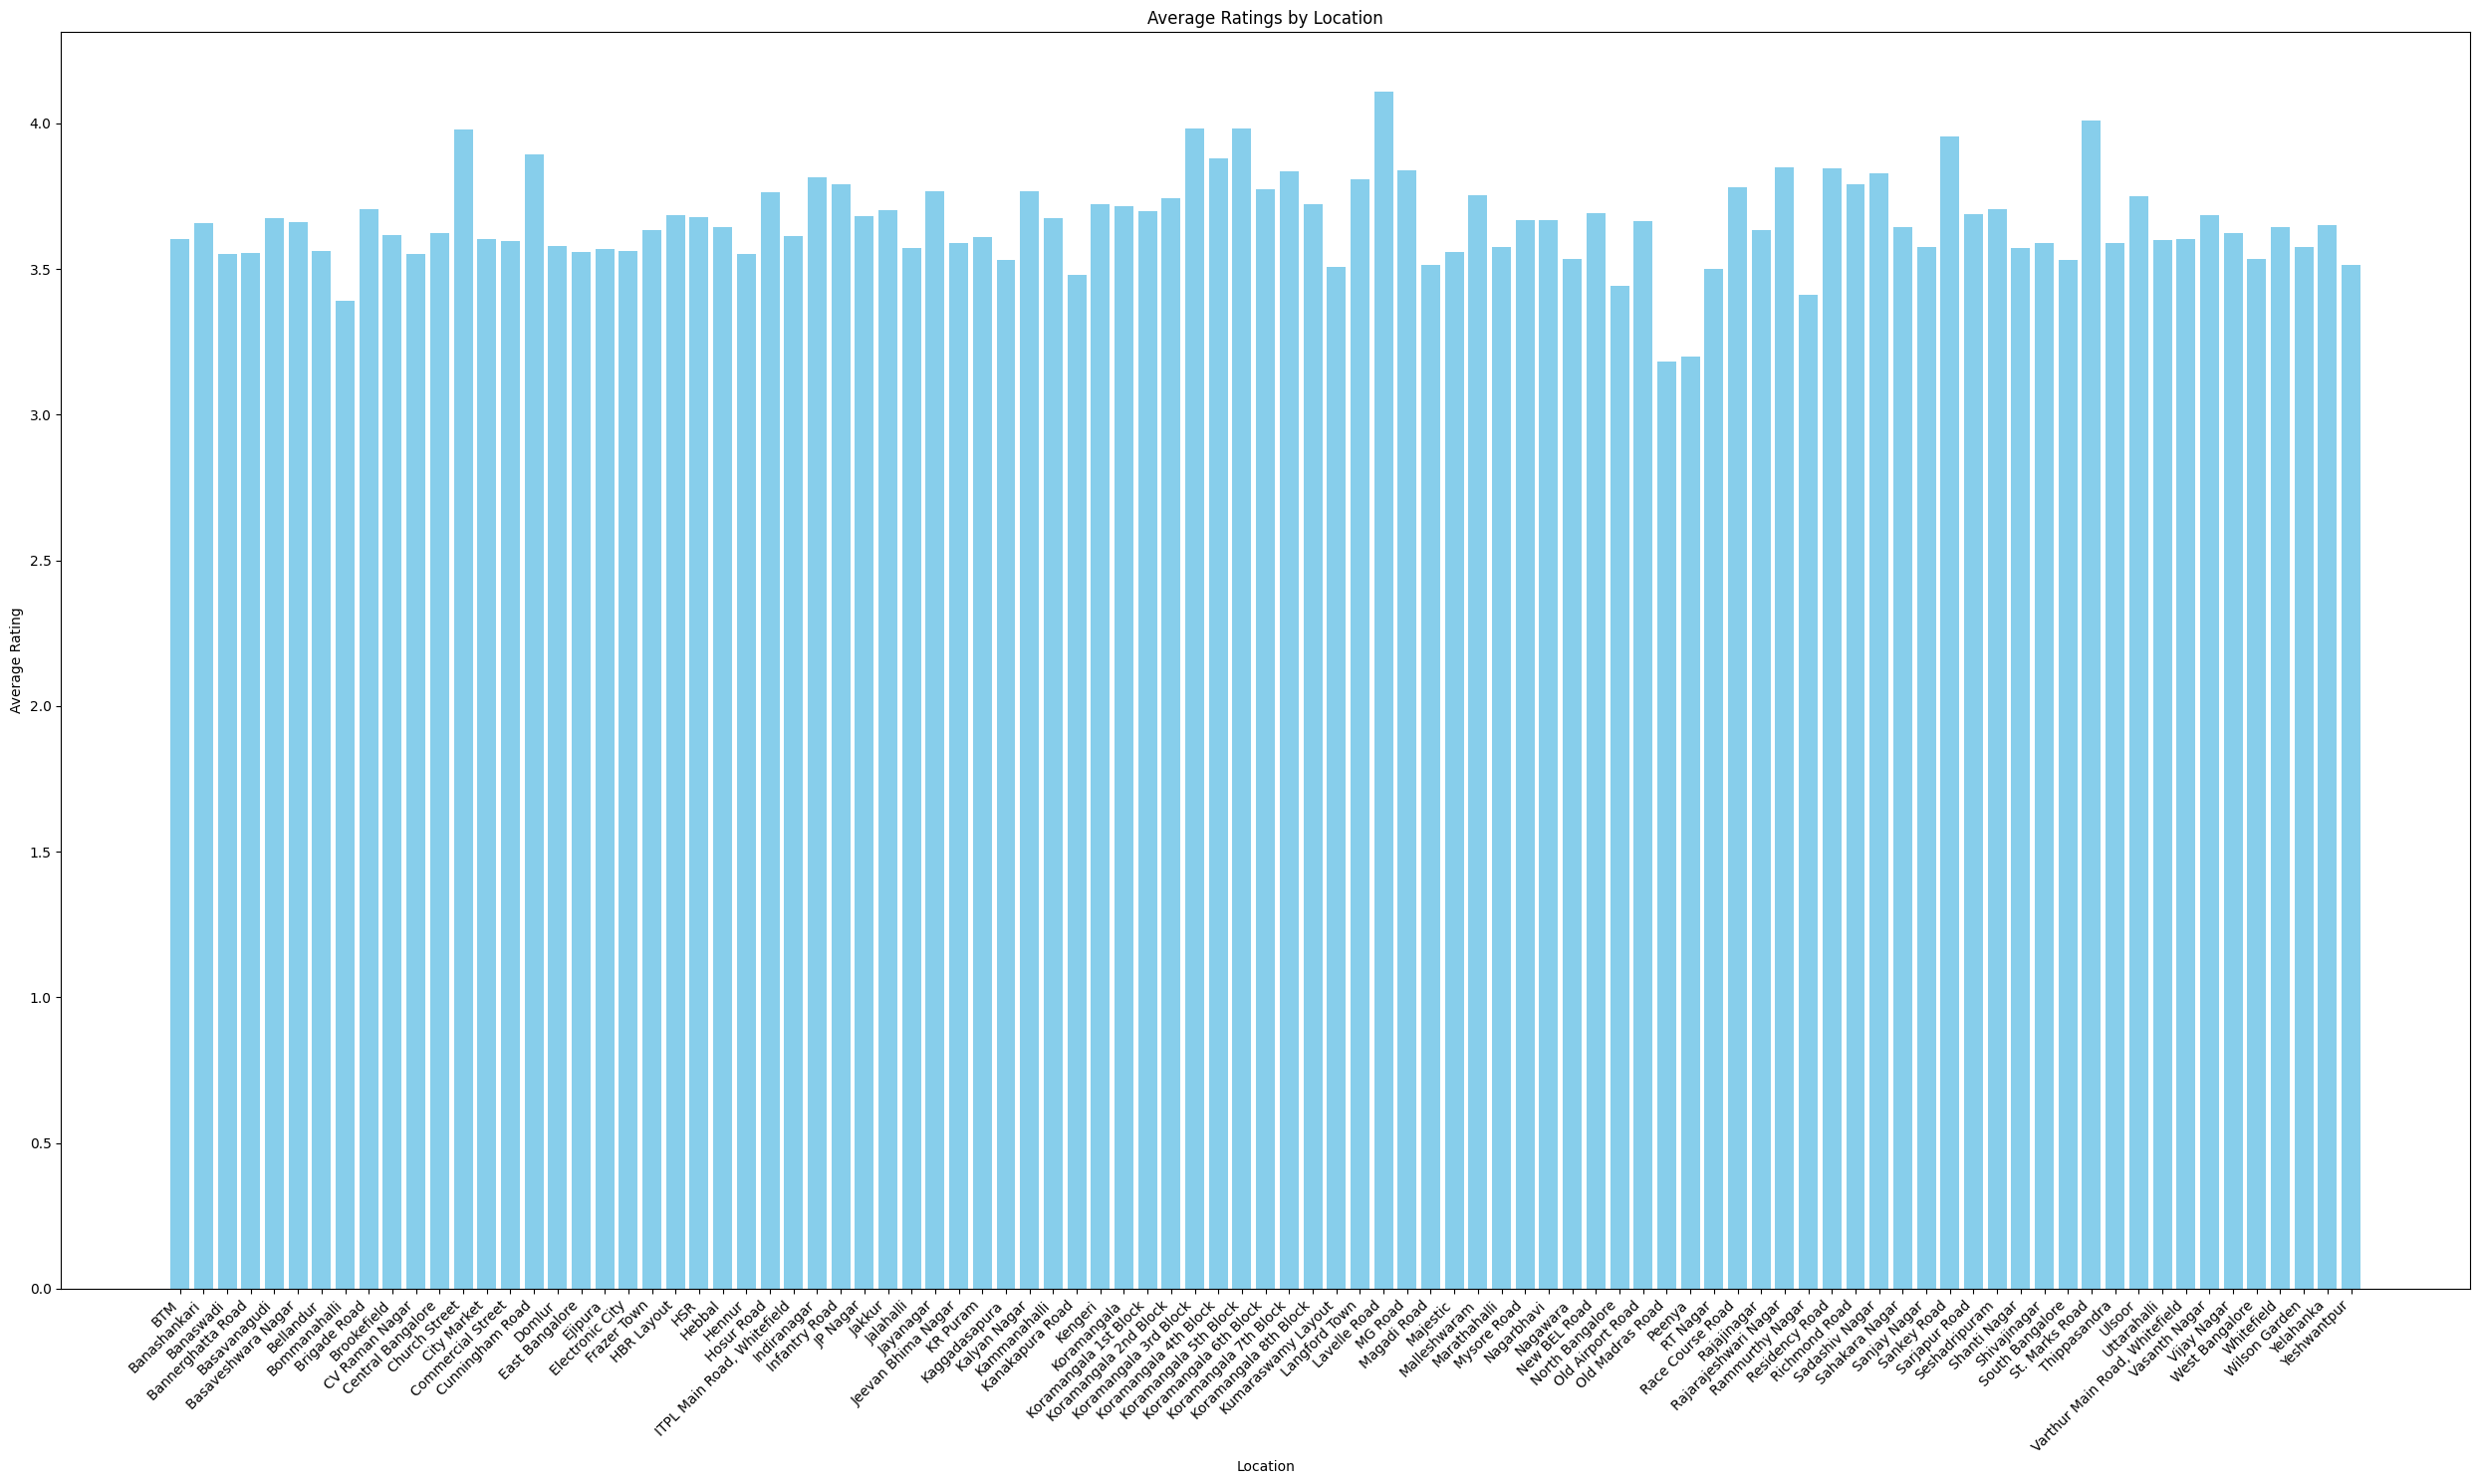

In [15]:
# Plotting
plt.figure(figsize=(25, 15))
plt.bar(location_ratings['location'], location_ratings['rate'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
print(df['rate'].unique())

[4.1        3.8        3.7        3.6        4.6        4.
 4.2        3.9        3.1        3.         3.2        3.3
 2.8        4.4        4.3        3.70044882 2.9        3.5
 2.6        3.4        4.5        2.5        2.7        4.7
 2.4        2.2        2.3        4.8        4.9        2.1
 2.         1.8       ]


In [18]:
df = df.rename(columns={'name': 'restaurant'})
df = df.rename(columns={'approx_cost(for two people)': 'cost'})

In [14]:
#costliest restaurants
sorted_df = df.sort_values(by='cost', ascending=False)

# Print details of the first 10 restaurants
costliest = sorted_df.head(10)
print("Details of the First 10 Restaurants:")
names_of_first_10_restaurants = sorted_df['restaurant'].head(10).tolist()
print("Names of the First 10 Restaurants:")
print(names_of_first_10_restaurants)

Details of the First 10 Restaurants:
Names of the First 10 Restaurants:
['Caffe Pascucci', 'The Onyx - The HHI Select Bengaluru', 'Ayda Persian Kitchen', 'Pindi Bangalore', 'Bathinda Dine', 'Engine', 'Ayda Persian Kitchen', '1947', 'Caffe Pascucci', 'The Onyx - The HHI Select Bengaluru']


In [15]:
#cheapest restaurants
sorted_df = df.sort_values(by='cost', ascending=True)

# Print details of the first 10 restaurants
cheapest = sorted_df.head(10)
print("Details of the First 10 Restaurants:")
names_of_first_10_restaurants = sorted_df['restaurant'].head(10).tolist()
print("Names of the First 10 Restaurants:")
print(names_of_first_10_restaurants)

Details of the First 10 Restaurants:
Names of the First 10 Restaurants:
['Foodhall', 'Cafe Treat - The Pride Hotel', 'Downtown', 'Subz', 'Mint Masala', 'Bella', 'ThrowBack - Pub & Dine', 'Helloo Delhi', 'Cable Car', 'The Blackboard Bakery']


In [23]:


#total rating with respect to location
location_ratings = df.groupby('location')['rate'].count().reset_index()

# Print the overall ratings for each location
print(location_ratings[['location', 'rate']])

             location  rate
0                 BTM  5124
1        Banashankari   906
2           Banaswadi   664
3   Bannerghatta Road  1630
4        Basavanagudi   684
..                ...   ...
88     West Bangalore     6
89         Whitefield  2144
90      Wilson Garden   246
91          Yelahanka     6
92        Yeshwantpur   119

[93 rows x 2 columns]


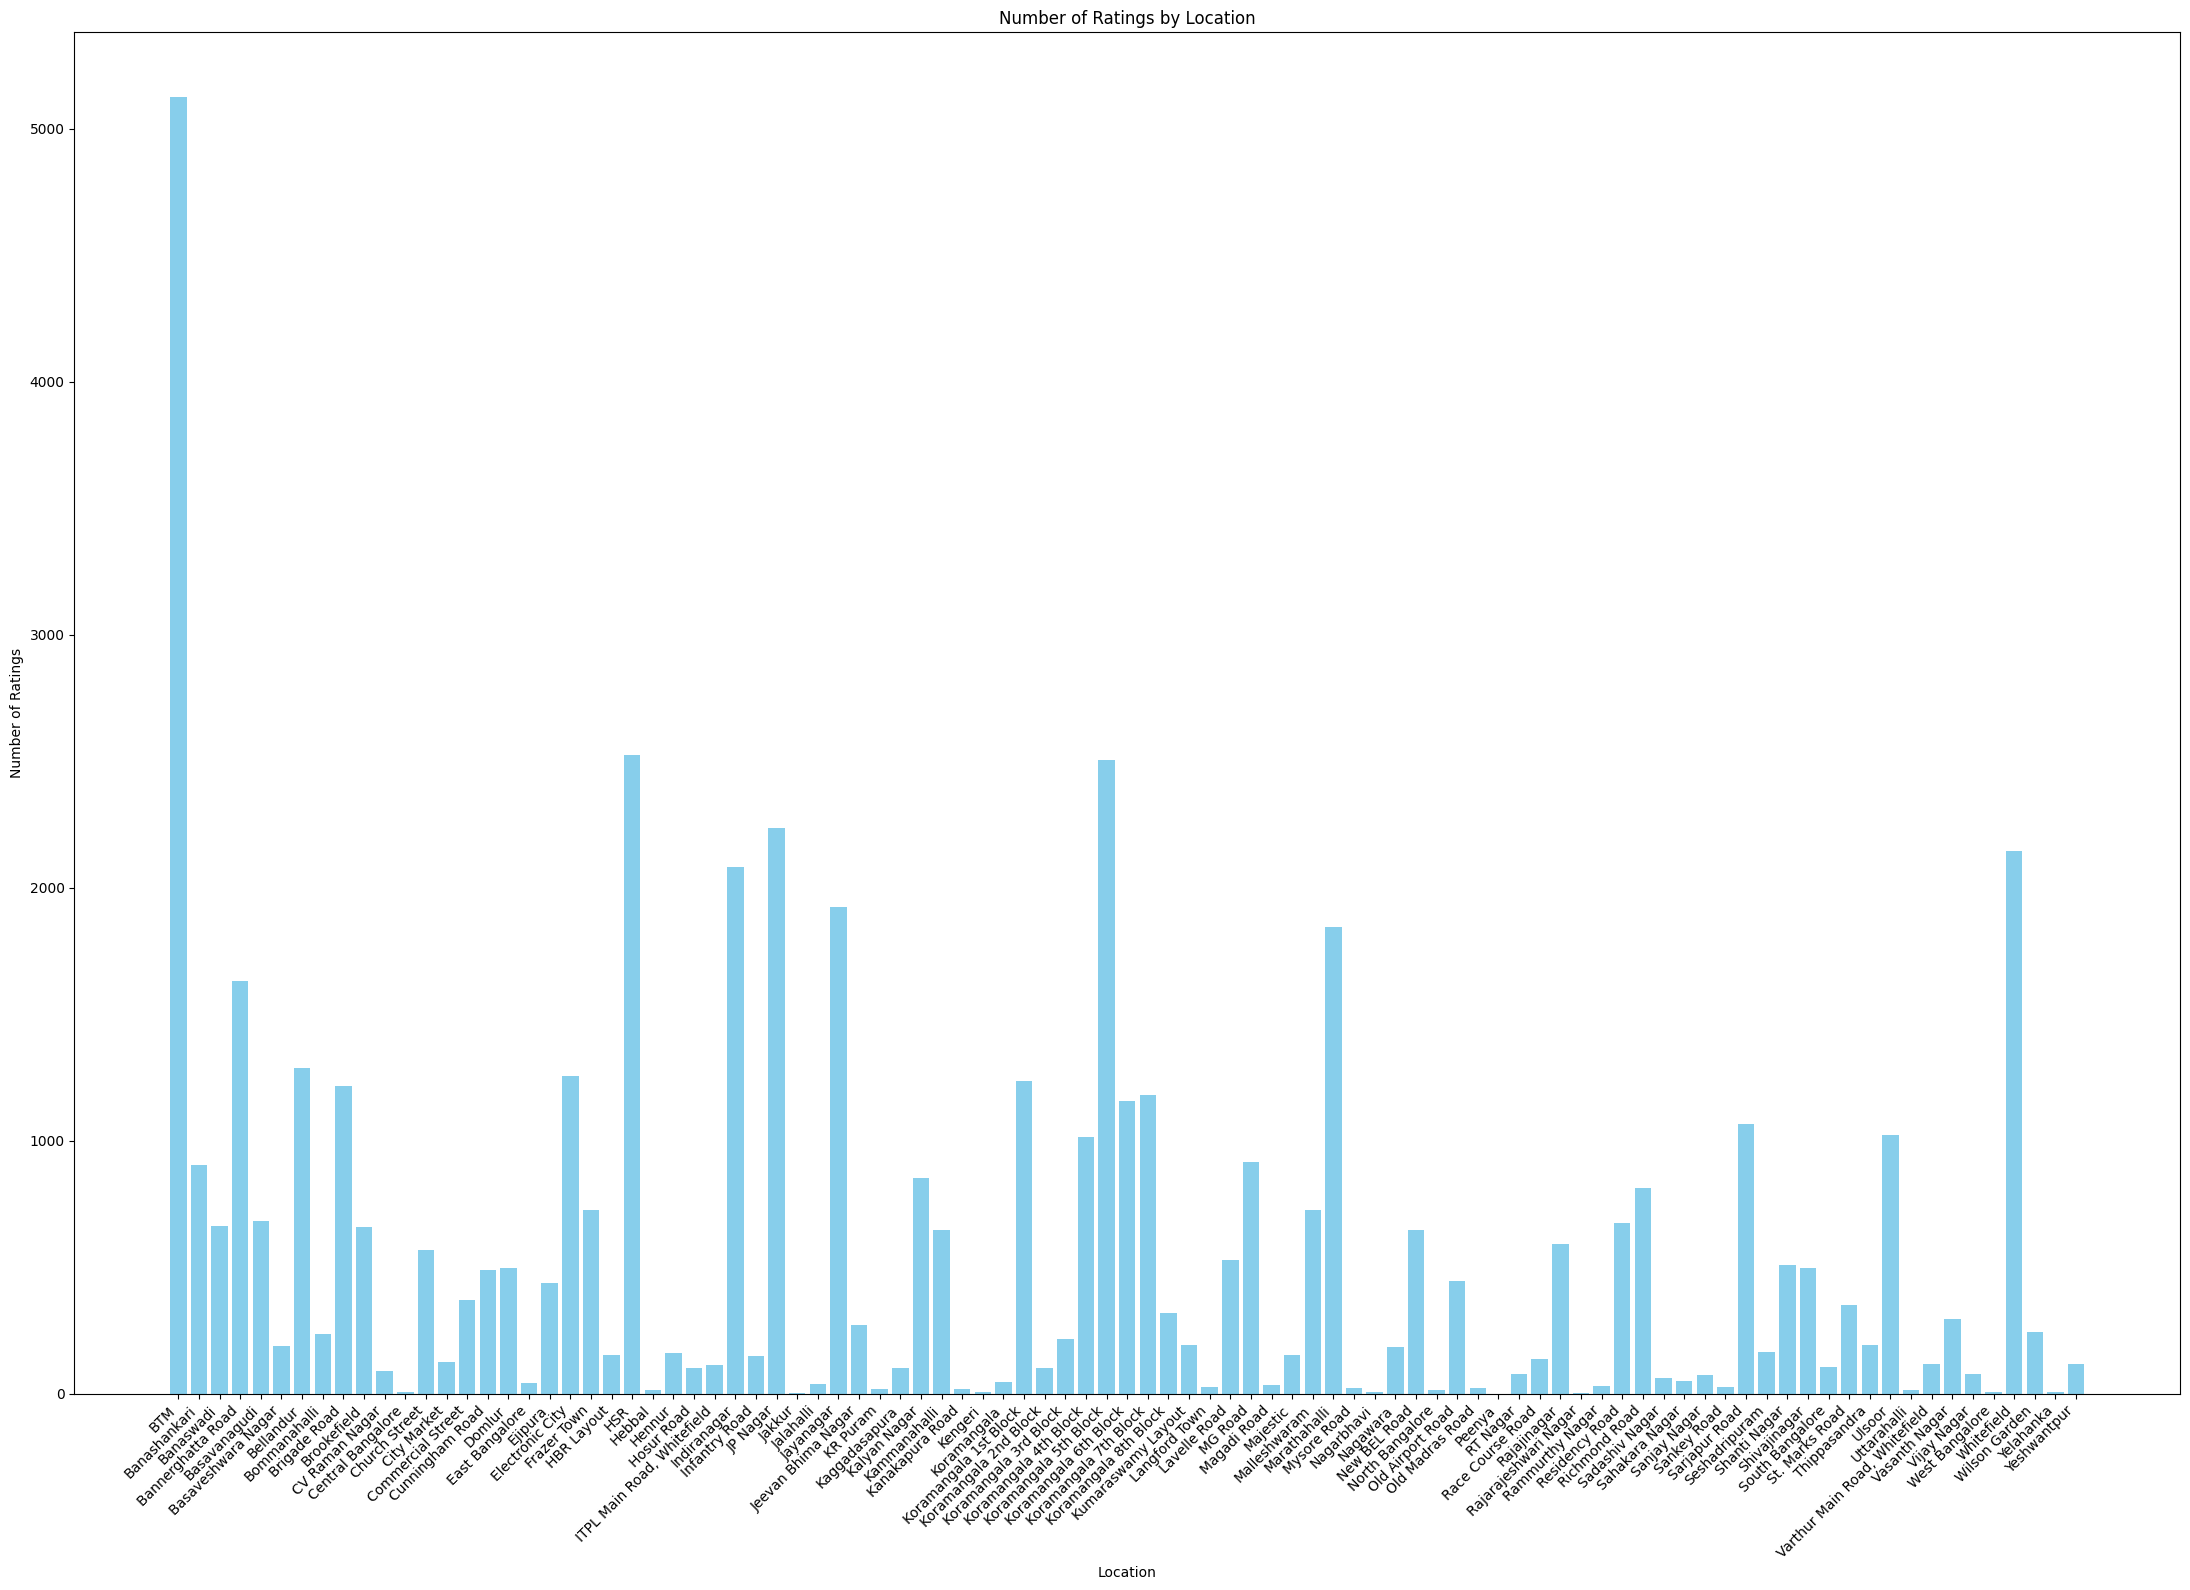

In [25]:
plt.figure(figsize=(22, 16))
plt.bar(location_ratings['location'], location_ratings['rate'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# most popular cuisine in each locality
cuisine_df = df.explode('cuisines')

# Group by 'location' and 'cuisines', then count the occurrences
locality_cuisine_count = cuisine_df.groupby(['location', 'cuisines']).size().reset_index(name='count')

# Find the most popular cuisine in each locality
most_popular_cuisine = locality_cuisine_count.groupby('location').apply(lambda x: x.loc[x['count'].idxmax()]).reset_index(drop=True)

# Print the most popular cuisine in each locality
print(most_popular_cuisine[['location', 'cuisines', 'count']])


             location                       cuisines  count
0                 BTM          North Indian, Chinese    379
1        Banashankari                   South Indian     84
2           Banaswadi                   South Indian     35
3   Bannerghatta Road          North Indian, Chinese    130
4        Basavanagudi                   South Indian     76
..                ...                            ...    ...
88     West Bangalore                        Biryani      2
89         Whitefield                   North Indian    181
90      Wilson Garden                   North Indian     47
91          Yelahanka  Kerala, South Indian, Seafood      2
92        Yeshwantpur          North Indian, Chinese     16

[93 rows x 3 columns]


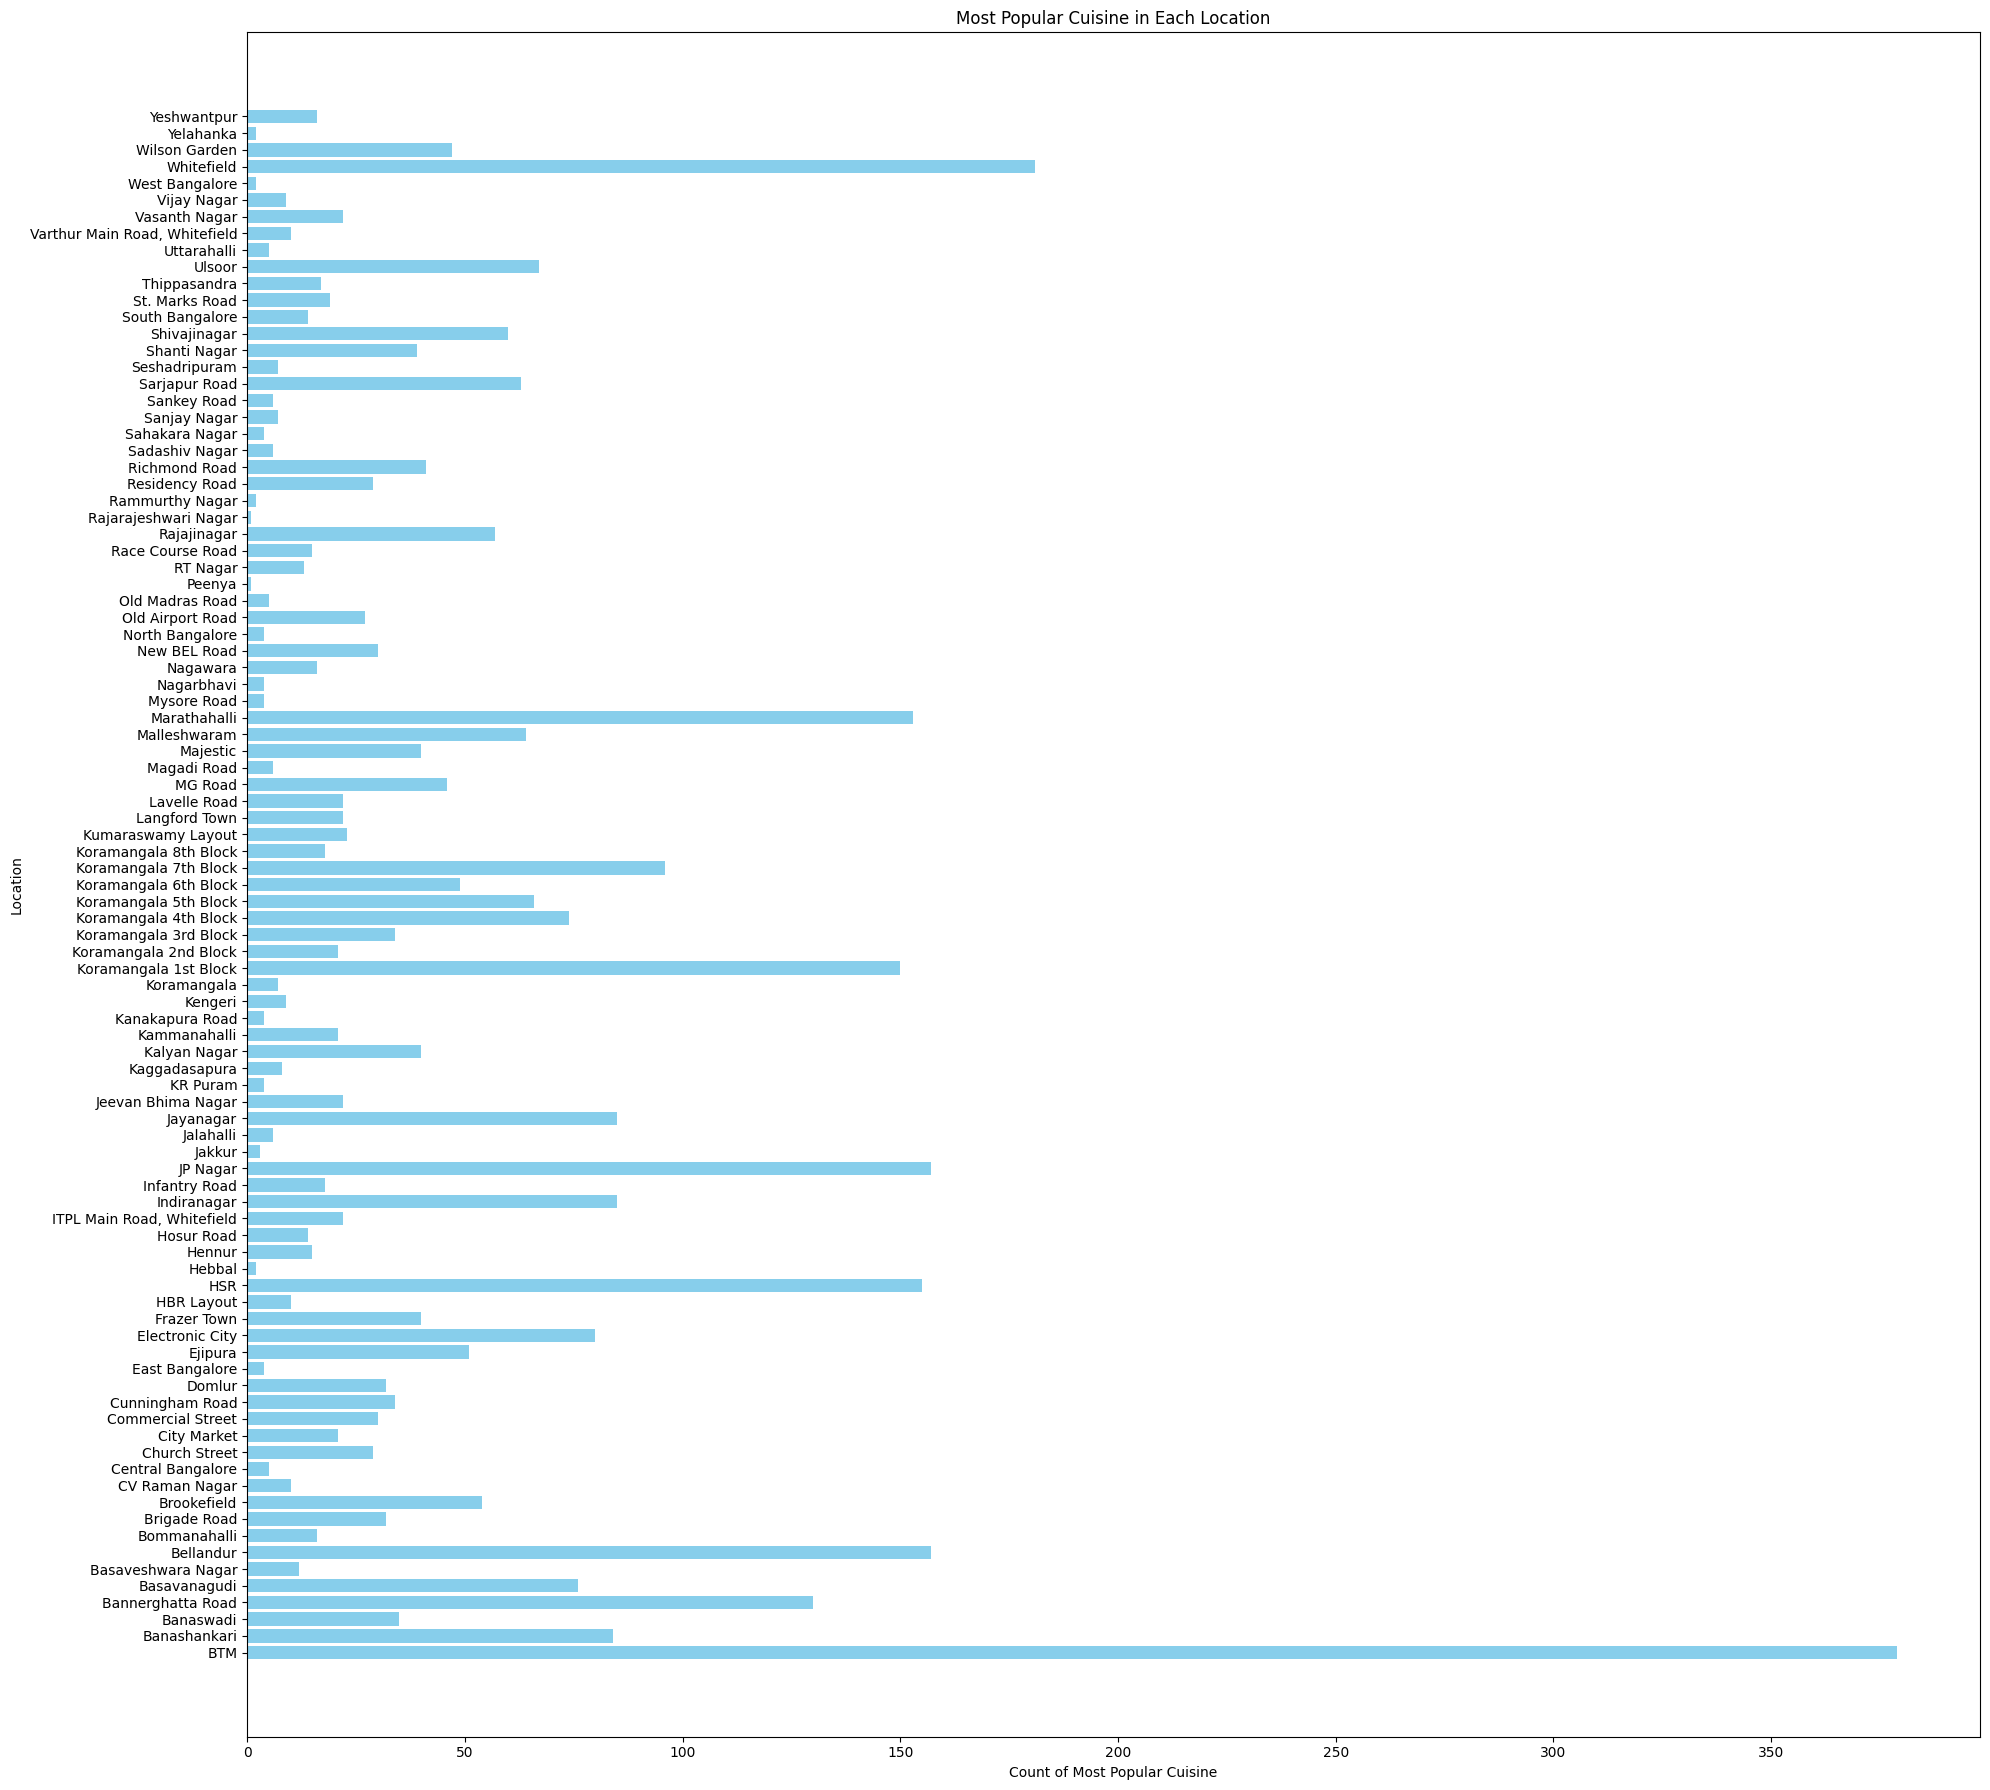

In [34]:
# Plotting using horizontal bar chart
plt.figure(figsize=(20, 18))
plt.barh(most_popular_cuisine['location'], most_popular_cuisine['count'], color='skyblue')
plt.xlabel('Count of Most Popular Cuisine')
plt.ylabel('Location')
plt.title('Most Popular Cuisine in Each Location')
plt.tight_layout()
plt.show()

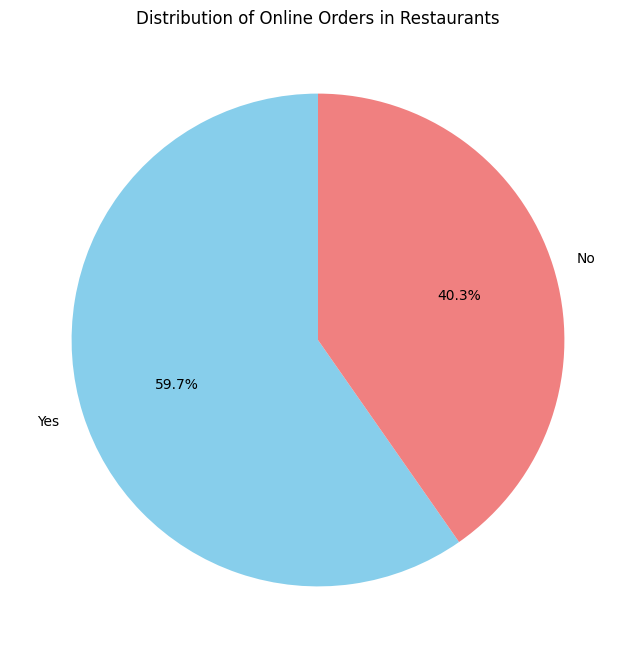

In [35]:
# Plotting pie chart for online orders
online_order_counts = df['online_order'].value_counts()
labels = online_order_counts.index
sizes = online_order_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Online Orders in Restaurants')
plt.show()

In [49]:
# Explore unique values in 'dish_liked'
unique_dishes = df['dish_liked'].unique()
print("Unique Dishes:")
print(unique_dishes)

Unique Dishes:
['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani'
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza'
 ...
 'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian'
 'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani'
 'Biryani, Andhra Meal']


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize 'dish_liked' column
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(df['dish_liked'])

# Create a dataframe with dish frequency
dish_frequency = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the frequency of each dish
total_dish_frequency = dish_frequency.sum(axis=0)

# Display the top N dishes based on frequency
top_n_dishes = total_dish_frequency.nlargest(10)
print("Top 10 Dishes based on Frequency:")
print(top_n_dishes)

Top 10 Dishes based on Frequency:
chicken      14541
biryani       7585
pizza         4585
pasta         4059
chocolate     3254
burgers       2972
masala        2956
cocktails     2790
coffee        2716
paneer        2619
dtype: int64


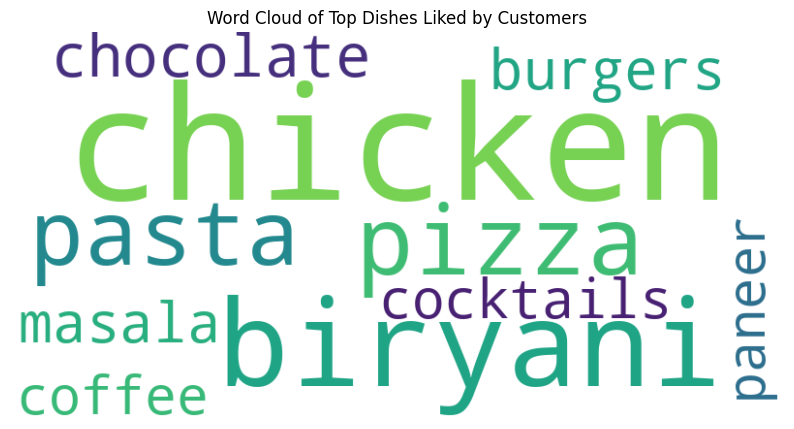

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the top dishes to a dictionary for word cloud
wordcloud_data = top_n_dishes.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Dishes Liked by Customers')
plt.show()

In [56]:
# Explore the distribution of restaurants across different areas
location_distribution = df['location'].value_counts()


# Explore competition in specific locations
top_locations = location_distribution.head(5)
competition_data = df[df['location'].isin(top_locations.index)]

# Display insights on competition
print("Top Locations with High Competition:")
print(top_locations)
print("\nSample Data for Competition Analysis:")
print(competition_data[['name', 'location', 'cuisines', 'rate']].head(5))

Top Locations with High Competition:
Koramangala 5th Block    1784
BTM                      1476
Indiranagar              1363
HSR                      1171
Jayanagar                1047
Name: location, dtype: int64

Sample Data for Competition Analysis:
                   name   location  \
38    Empire Restaurant  Jayanagar   
53    Biryanis And More  Jayanagar   
86        Meghana Foods  Jayanagar   
148  Sri Udupi Food Hub  Jayanagar   
155           Roll Over  Jayanagar   

                                              cuisines  rate  
38        North Indian, Mughlai, South Indian, Chinese   4.4  
53   Biryani, North Indian, Chinese, Andhra, South ...   4.0  
86                      Biryani, North Indian, Chinese   4.4  
148     South Indian, North Indian, Chinese, Beverages   4.1  
155  Desserts, Ice Cream, Beverages, Fast Food, San...   4.1  


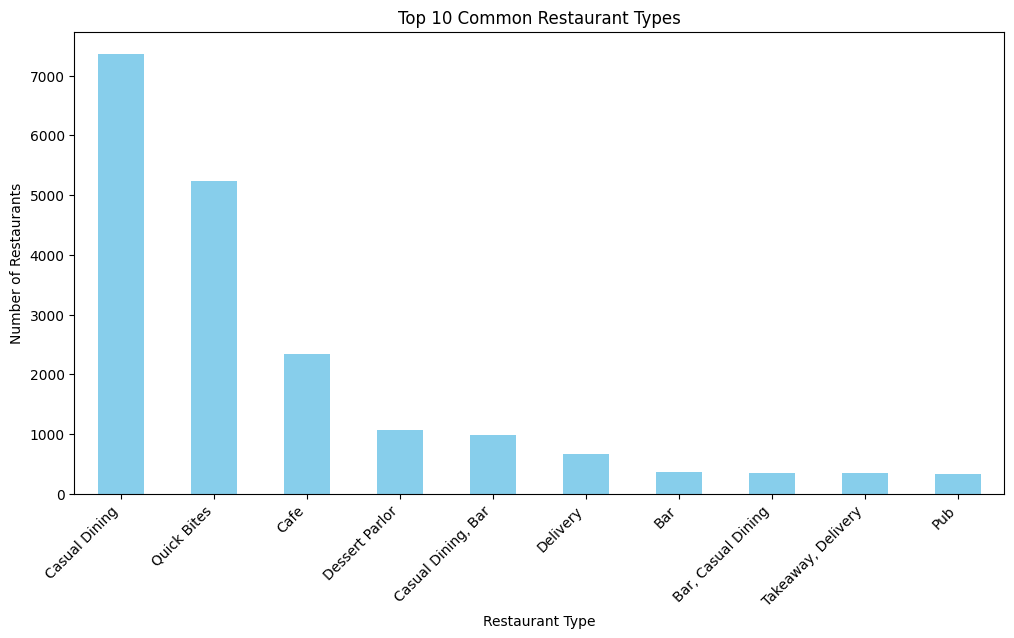

In [58]:
# Analyze the 'rest_type' column to identify the most common restaurant types
common_rest_types = df['rest_type'].value_counts().head(10)

# Visualize the distribution of restaurant types
plt.figure(figsize=(12, 6))
common_rest_types.plot(kind='bar', color='skyblue')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Common Restaurant Types')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# Correlation Analysis
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
correlation = df['approx_cost(for two people)'].corr(df['rate'])
print(f"\nCorrelation between Cost and Rating: {correlation}")


Correlation between Cost and Rating: 0.0827794129500532


In [68]:
df= df.dropna(subset=['votes'])
#Correlation Analysis
correlation = df['rate'].corr(df['votes'])
print(f"\nCorrelation between Rating and Votes: {correlation}")


Correlation between Rating and Votes: 0.38029740670419665
